## Use the Chunking Experiment Class in the Analysis folder

### 1. Import the ChunkingExperiment Class

In [1]:
from notebook_utils import setup_notebook_environment, style_dataframe
setup_notebook_environment()
from app.analysis.chunking_experiment import ChunkingExperiment

import pandas as pd
import matplotlib.pyplot as plt# Other imports you might need


Added /home/sng/nanobot-poc to Python path
Notebook environment setup complete


### 2. Initialize the Experiment with Your Document

In [2]:
# Path to your document
doc_path = "/home/sng/nanobot-poc/data/original/Harvard/cns-safety-manual.pdf"

# Initialize the experiment with your document
experiment = ChunkingExperiment(document_path=doc_path)

# Alternatively, if you already have a converted document:
# experiment = ChunkingExperiment(converted_doc=converted_doc)

Converting document: /home/sng/nanobot-poc/data/original/Harvard/cns-safety-manual.pdf
Docling is now converting /home/sng/nanobot-poc/data/original/Harvard/cns-safety-manual.pdf...
Saving docling and md...
Saved processed documents to /home/sng/nanobot-poc/data/parsed-doc/cns-safety-manual
Document conversion complete!
✅ Converted document


### 3. Run Different Chunking Strategies

In [3]:
from app.document_conversion.chunking import get_available_chunking_strategies

In [4]:
# Get available strategies
available_strategies = list(get_available_chunking_strategies().keys())
print(f"Available chunking strategies: {available_strategies}")

# Run all available strategies
results = experiment.run_all_strategies()

# Or run specific strategies
# results = experiment.run_all_strategies(["default", "balanced", "fine_grained"])

Available chunking strategies: ['default', 'balanced', 'fine_grained', 'context', 'hierarchical']


===== Testing default chunking strategy =====
Now chunking document using 'default' strategy...
Now processing chunks...
Done! Returning 83 chunks ready for preview
✅ Created DataFrame with 83 chunks

Sample chunks for default strategy:
   chunk_id                                                                                                                                                                                                      text_preview  text_length          meta_filename meta_page_numbers                  meta_title               meta_headings meta_chunking_strategy
0        80       Nanomaterials or nanoparticles are human engineered particles with at least one dimension in the range of one to one hundred nanometers.  They can be composed of many different base materials (carbon,...          779  cns-safety-manual.pdf                50      What are Nanomaterials     

### 4. Compare Results


Strategy Comparison:
       strategy  total_chunks  avg_length  min_length  max_length
0       default            83  826.204819          23        6013
1      balanced            87  788.172414          23        3834
2  fine_grained           256  267.187500           8        2386
3       context            83  826.204819          23        6013
4  hierarchical           252  271.452381           8        2971


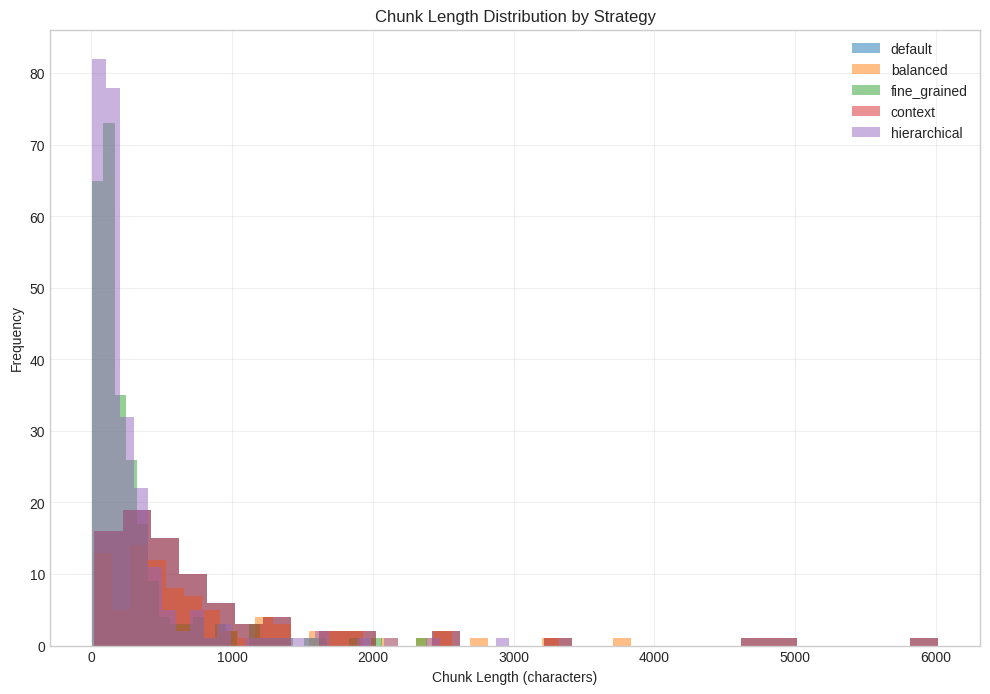

In [5]:
# Compare strategies
comparison = experiment.compare_strategies()
print("\nStrategy Comparison:")
print(comparison)

# Visualize chunk length distributions
experiment.visualize_chunk_lengths()

### 5. Save Results for Later Analysis

In [16]:
import os
# from pathlib import Path

# Extract filename from the experiment
filename = experiment.document_path  # Adjust as needed

# Get the stem (filename without extension)
file_stem = os.path.splitext(os.path.basename(filename))[0]

# Specify the absolute path to the data directory
base_dir = "/home/sng/nanobot-poc/data/chunking_results"

# Create the full output directory path
output_dir = os.path.join(base_dir, file_stem)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save results to the filename-specific directory
experiment.save_results(output_dir=output_dir)

print(f"Results saved to {output_dir}")


✅ Saved all results to /home/sng/nanobot-poc/data/chunking_results/cns-safety-manual
Results saved to /home/sng/nanobot-poc/data/chunking_results/cns-safety-manual


### 6. Access Individual Strategy Results

In [17]:
# Access results for a specific strategy
default_results = experiment.results["default"]
default_df = default_results["df"]

# Display the DataFrame with styling
styled_df = default_df.style.set_properties(**{
    'white-space': 'pre-wrap', 
    'text-align': 'left',
    'font-size': '13px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#f0f0f0'), ('text-align', 'center')]
}])

# Display the styled DataFrame
styled_df

,chunk_id,text,text_length,meta_filename,meta_page_numbers,meta_title,meta_headings,meta_chunking_strategy
0,0,∞ Push a Yellow 'Emergency Gas Off' button ∞ Evacuate the building immediately ∞ Alert others on the way out ∞ Meet outside in front of Pierce Hall,147,cns-safety-manual.pdf,4,IF A TOXIC GAS LEAK OCCURS,IF A TOXIC GAS LEAK OCCURS,default
1,1,∞ Evacuate the building immediately ∞ Alert others on the way out ∞ Meet outside in front of Pierce Hall,104,cns-safety-manual.pdf,4,IF YOU HEAR THE FIRE ALARM,IF YOU HEAR THE FIRE ALARM,default
2,2,"∞ If the victim is by themselves, stay close to assist. ∞ Call 911 and demand an ambulance. ∞ If requested, assist the person in removing contaminated clothing being careful not to become contaminated. ∞ Advise person to stay in shower 5 minutes for HF contamination, and 15 minutes for all other chemicals. ∞ If the chemical is Hydrofluoric Acid (HF) assist the victim in applying Calgonate (calcium gluconate) while wearing clean gloves. ∞ Get the MSDS sheet (from Fire Command Center or print from on-line) and hand it to the Emergency Response Team or fire department. ∞ Notify a staff member or call the Operations Center at 617-495-5560.",643,cns-safety-manual.pdf,4,IF YOU SEE SOMEONE UNDER THE EMERGENCY SHOWER OR EYE WASH,IF YOU SEE SOMEONE UNDER THE EMERGENCY SHOWER OR EYE WASH,default
3,3,∞ Approach the nearest emergency shower or eye wash and pull the handle to activate. ∞ Demand help but remain under the emergency shower or eye wash.,149,cns-safety-manual.pdf,4,IF YOU GET CHEMICALS ON YOUR SKIN,IF YOU GET CHEMICALS ON YOUR SKIN,default
4,4,∞ Pull fire alarm located at emergency exit doors ∞ Evacuate the building immediately. ∞ Alert others on the way out. ∞ Meet outside in front of Pierce Hall.,157,cns-safety-manual.pdf,4,IF A FIRE STARTS,IF A FIRE STARTS,default
5,5,"o Prior to access to CNS laboratories, ensure all employees, students, and/ outside users have been trained on this document. o Enforce the contents of this document in areas that you supervise. o Periodically review the contents of this document with the staff. o Administer the reading and recordkeeping of this manual for all CNS staff and all users assigned to work in the CNS areas.",387,cns-safety-manual.pdf,5,CNS Management and Administration,CNS Management and Administration,default
6,6,"As the Safety Manual author, the LISE Health, and Safety Officer reviews this manual periodically to ensure its continued effectiveness. Serve as point of contact for any questions relating to this document or any other environmental health and safety concerns. Enforce the contents of this document in areas that you supervise.",329,cns-safety-manual.pdf,5,LISE Health and Safety Officer,LISE Health and Safety Officer,default
7,7,"Safety: ensure a safe working environment. Success: promote successful laboratory operation, scientifically and educationally productive. Successful laboratory operation relies on individual user's understanding, participation, and selfdiscipline. Everyone, whether faculty member, student user, or staff engineer, is equally important to the success of the protocols established at CNS. Successful operation is a shared responsibility among all users and staff members. Satisfaction: communicate operational strategies that satisfy user's needs. Awareness: Provide guidance and basic awareness. Prepare experimentalists for their future roles.",645,cns-safety-manual.pdf,5,Purpose,Purpose,default
8,8,"This manual is required reading for all employees and users of CNS laboratories. This manual describes the safety hazards, engineering controls, and safety policies common to laboratories. Study and mastery of the material in this manual are obligatory but insufficient for laboratory access. Each laboratory and instrument also have dedicated training including additional safety detail.",388,cns-safety-manual.pdf,6,Scope,Scope,default
9,9,"SDS (Safety Data Sheets) Function: For determining chemical hazards and recomm

### 7. Insert into Database (Optional)

In [18]:
# Insert chunks from selected strategies into the database
inserted_ids = experiment.insert_into_database(['default', 'balanced', 'fine_grained', 'context', 'hierarchical'])

# Print results
for strategy, ids in inserted_ids.items():
    print(f"Inserted {len(ids)} chunks for {strategy} strategy")


Inserting chunks for 'default' strategy...
Adding embeddings to 83 chunks...
Uploading chunks to database...
✅ Chunk validation successful:
  • Text length: 147 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 104 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 643 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 149 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 157 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']


KeyboardInterrupt: 